In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/titanic_data.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# given chance of passengers paid over $100 for their ticket, what is the chance that they survived?
# P(Survived = 1 | Fare > 100)

len(df[(df['Fare'] > 100) & (df['Survived'] == 1)])/len(df[(df['Fare'] > 100)])

0.7358490566037735

In [5]:
df[df['Fare'] >= 100]['Survived'].value_counts()

1    39
0    14
Name: Survived, dtype: int64

In [6]:
39/(39+14)

0.7358490566037735

In [7]:
# Probability that s surviving passenger was male
# P(passenger = 'man' | survived = '1')
len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])/len(df[(df['Survived'] == 1)])

0.31871345029239767

In [8]:
df[df['Survived'] == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [9]:
109/(233+109)

0.31871345029239767

In [10]:
# Outlook    Temp.    Humidity    Wind    Decision
df = pd.read_csv('datasets/tennis.txt', delimiter="\t", header=None, names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])
df

,Outlook,Temp,Humidity,Wind,Decision
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes
10,Rain,Mild,Normal,Weak,Yes


In [11]:
# P(play = yes | wind = weak)
df[df['Decision'] == 'Yes']['Wind'].value_counts()

Weak      6
Strong    3
Name: Wind, dtype: int64

In [12]:
6/(6+3)

0.6666666666666666

In [13]:
len(df[(df['Decision'] == 'Yes') & (df['Wind'] == 'Weak')])/len(df[(df['Wind'] == 'Weak')])

0.75

In [14]:
# P(play = yes | wind = strong)
len(df[(df['Decision'] == 'Yes') & (df['Wind'] == 'Strong')])/len(df[(df['Wind'] == 'Strong')])

0.5

In [15]:
# P(play = no | wind = weak)
len(df[(df['Decision'] == 'No') & (df['Wind'] == 'Weak')])/len(df[(df['Wind'] == 'Weak')])

0.25

In [16]:
# P(play = no | wind = strong)
len(df[(df['Decision'] == 'No') & (df['Wind'] == 'Strong')])/len(df[(df['Wind'] == 'Strong')])

0.5

In [17]:
def tennis_decision(decision, wind):
    return len(df[(df['Decision'] == decision) & (df['Wind'] == wind)])/len(df[(df['Wind'] == wind)])

In [18]:
print(tennis_decision('Yes', 'Weak'))
print(tennis_decision('No', 'Weak'))
print(tennis_decision('Yes', 'Strong'))
print(tennis_decision('No', 'Strong'))

0.75
0.25
0.5
0.5


In [19]:
def conditional_prob(c1, c2, condition):
    df_new = df[df[c1] == condition][c2]
    s = df_new.unique()
    popsize = len(df_new)
    pr = {}
    for i in s:
        pr[i] = len(df[(df[c1] == condition) & (df[c2] == i)]) / popsize
    return pr

print(conditional_prob('Wind', 'Decision', 'Weak'))
print(conditional_prob('Wind', 'Decision', 'Strong'))

{'No': 0.25, 'Yes': 0.75}
{'No': 0.5, 'Yes': 0.5}


In [20]:
df = pd.read_csv('datasets/titanic_data.csv')

In [21]:
ls_age = df['Age'].dropna().values

In [22]:
import seaborn as sns

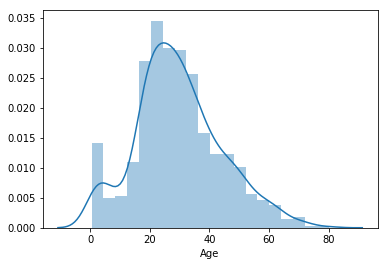

In [23]:
# pdf = probability density function
# if you want to know the age under 40. Calculate the area under the curve until 40

# take derivative of 20-40 in the case of pdf

sns.distplot(df['Age'].dropna(), hist = True, kde = True, bins = 20)

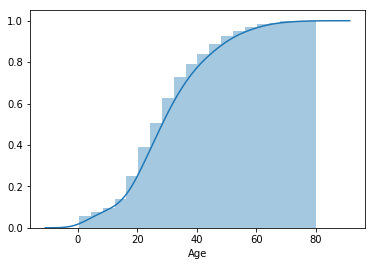

In [24]:
# cdf = cumulative density function
# If you want to find the % of people under 40, can just match value. ~.7
# Fx(40) = P(x <= 40)
sns.distplot(df['Age'].dropna(), hist_kws = dict(cumulative = True), kde_kws = dict(cumulative = True))

In [30]:
# Fx(a) - Fx(b) = P(b <= x <= a)
# ex: if you wanted to get the ages between 20 and 40, subtract the two values .8 - .2 with CDF

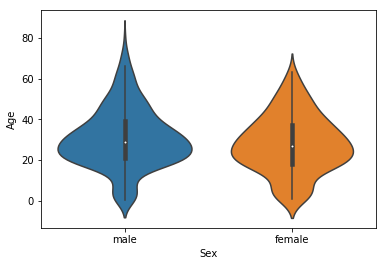

In [34]:
sns.violinplot(x = "Sex", y = "Age", data = df)

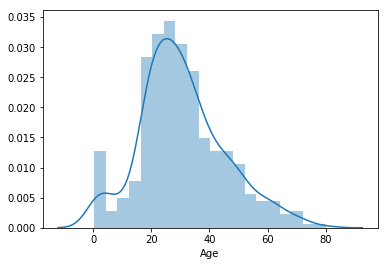

In [27]:
sns.distplot(df[df['Sex'] == 'male']['Age'].dropna(), hist = True, kde = True, bins = 20)

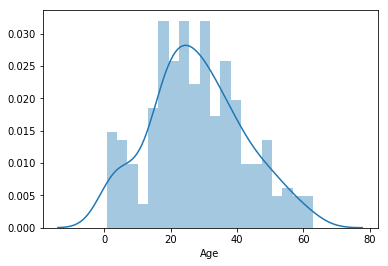

In [29]:
sns.distplot(df[df['Sex'] == 'female']['Age'].dropna(), hist = True, kde = True, bins = 20)

In [35]:
import scipy.stats as st

In [41]:
print(st.norm.cdf(1) - st.norm.cdf(-1))

0.6826894921370859


In [42]:
print(st.norm.cdf(2) - st.norm.cdf(-2))

0.9544997361036416


In [43]:
print(st.norm.cdf(3) - st.norm.cdf(-3))

0.9973002039367398


In [48]:
# The instructor of Math, graded students final exam. He is reporting that the mean was 60 out of 100 with standard 
# deviation of 10. What is the probability that students got more than 70?
import numpy as np
import matplotlib.pyplot as plt

s = np.random.normal(60, 10, size = 100000)

(array([2.22833643e-06, 1.33700186e-05, 6.68500930e-05, 2.16148634e-04,
        8.04429453e-04, 2.43111505e-03, 6.27053873e-03, 1.32897985e-02,
        2.34688393e-02, 3.35253217e-02, 3.97490653e-02, 3.76477441e-02,
        2.95767095e-02, 1.89364030e-02, 1.04219295e-02, 4.31405934e-03,
        1.46847371e-03, 4.92462352e-04, 1.11416822e-04, 2.67400372e-05]),
 array([ 11.51921828,  16.00687097,  20.49452366,  24.98217635,
         29.46982905,  33.95748174,  38.44513443,  42.93278712,
         47.42043982,  51.90809251,  56.3957452 ,  60.88339789,
         65.37105059,  69.85870328,  74.34635597,  78.83400866,
         83.32166136,  87.80931405,  92.29696674,  96.78461943,
        101.27227213]),
 <a list of 20 Patch objects>)

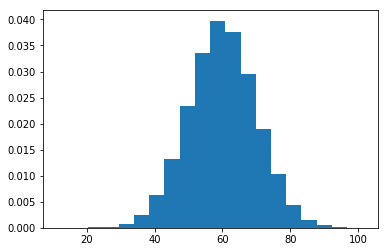

In [50]:
plt.hist(s, bins = 20, density = True)

In [56]:
1 - st.norm.cdf(70, loc=60, scale = 10)

0.15865525393145707

In [57]:
from scipy.stats import norm
norm.sf(70, loc = 60, scale = 10)

0.15865525393145707